In [1]:
import os
import json
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

repo = '<path to data repo>'

# Load data from repo

In [2]:
df_01 = pd.read_csv(repo+'/01/01model_check.csv', header=[0], index_col=[0])
df_02 = pd.read_csv(repo+'/02/02model_check.csv', header=[0], index_col=[0])

df_01 = df_01
print(len(df_01))

df_01['run'] = 1
df_02['run'] = 2

df_mc = pd.concat([df_01, df_02])
df_mc.head()

54


,stack_data,set_data,state_size,n_states,adj_list_compile,stack_compile,set_compile,run
0,8,15,4,15,184,12,24,1
1,8,15,4,15,184,12,24,1
2,8,15,4,15,184,12,24,1
3,8,7,4,15,184,12,24,1
4,4,4,4,15,184,12,24,1


In [3]:
df_usage_01 = pd.read_csv(repo+'/01/01usage.csv', header=[0], index_col=[0])
df_usage_02 = pd.read_csv(repo+'/02/02usage.csv', header=[0], index_col=[0])
df_usage_11 = pd.read_csv(repo+'/11/11usage.csv', header=[0], index_col=[0])
df_usage_12 = pd.read_csv(repo+'/12/12usage.csv', header=[0], index_col=[0])

df_usage_01['run'] = 1
df_usage_01['method'] = 'multi'
df_usage_02['run'] = 3
df_usage_02['method'] = 'multi'

df_usage_11['run'] = 1
df_usage_11['method'] = 'single'
df_usage_12['run'] = 3
df_usage_12['method'] = 'single'

df_usage = pd.concat([df_usage_01, df_usage_02, df_usage_11, df_usage_12])
df_usage.head()

,pr,ni,virt,res,shr,status,cpu_perc,mem_perc,cpu_time,mem_total,mem_free,mem_used,cache,swap_total,swap_free,swap_used,process_uptime,run,method
0,20.0,0.0,37536.0,3528.0,2904.0,S,6.7,0.4,0.58,922.0,642.0,81.5,197.0,100.0,100.0,0.0,0.000,1,multi
1,20.0,0.0,37536.0,3528.0,2904.0,S,0.0,0.4,0.58,922.0,642.0,81.5,197.0,100.0,100.0,0.0,0.001,1,multi
2,20.0,0.0,37536.0,3528.0,2904.0,S,0.0,0.4,0.58,922.0,642.0,81.5,197.0,100.0,100.0,0.0,0.002,1,multi
3,20.0,0.0,37536.0,3528.0,2904.0,S,0.0,0.4,0.58,922.0,642.0,81.5,197.0,100.0,100.0,0.0,0.003,1,multi
4,20.0,0.0,37536.0,3528.0,2904.0,S,0.0,0.4,0.58,922.0,642.0,81.5,197.0,100.0,100.0,0.0,0.004,1,multi


In [4]:
df_plan_01 = pd.read_csv(repo+'/01/01plan.csv', header=[0], index_col=[0])
df_plan_02 = pd.read_csv(repo+'/02/02plan.csv', header=[0], index_col=[0])

df_plan_01['run'] = 1
df_plan_02['run'] = 2

df_plan = pd.concat([df_plan_01, df_plan_02])
df_mc['steps'] = df_plan.steps.values
df_plan.head()


,accept,path,plan,latency,steps,run
0,3,0 1,left -> default,8.841,2,1
1,3,0 1,left -> default,7.212,2,1
2,4,0 2,right -> default,4.395,2,1
3,8 12,0 2 4 6,right -> straight -> left -> default,5.864,4,1
4,11,0 1 3 9,left -> straight -> left -> default,14.022,4,1


# Plan execution and processing latency

### Number of plans

In [5]:
df_plan[df_plan.run == 1].count()

accept     50
path       50
plan       50
latency    54
steps      54
run        54
dtype: int64

In [6]:
df_plan[df_plan.run == 2].count()

accept     46
path       46
plan       46
latency    46
steps      46
run        46
dtype: int64

<Axes: xlabel='run', ylabel='count'>

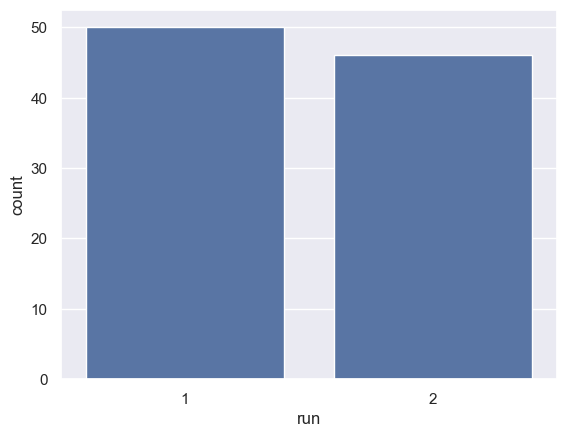

In [7]:
sns.countplot(df_plan.dropna(axis=0), x='run')

### Comparison of steps

<Axes: xlabel='run', ylabel='count'>

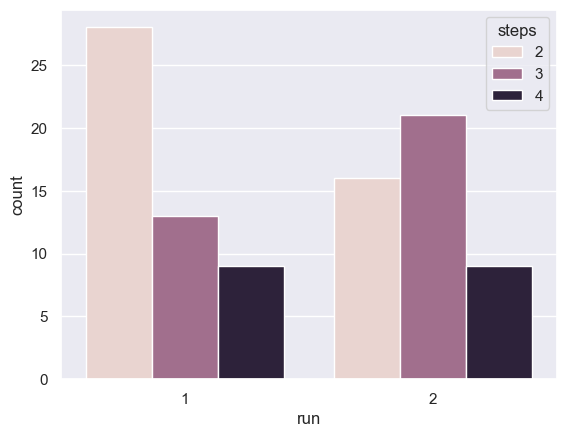

In [8]:
sns.countplot(df_plan.dropna(axis=0), x='run', hue='steps')

In [9]:
len(df_plan[df_plan.steps == 1].dropna(axis=0)), len(df_plan[df_plan.steps == 2].dropna(axis=0)), len(df_plan[df_plan.steps == 3].dropna(axis=0))

(0, 44, 34)

<Axes: xlabel='steps', ylabel='count'>

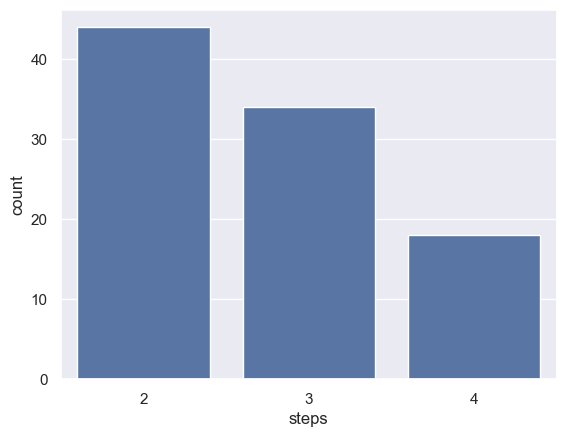

In [10]:
sns.countplot(df_plan.dropna(axis=0), x='steps')

C:\Users\possi\AppData\Local\Temp\ipykernel_16620\4051495310.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2-step', '3-step', '4-step'], fontsize=14*2)


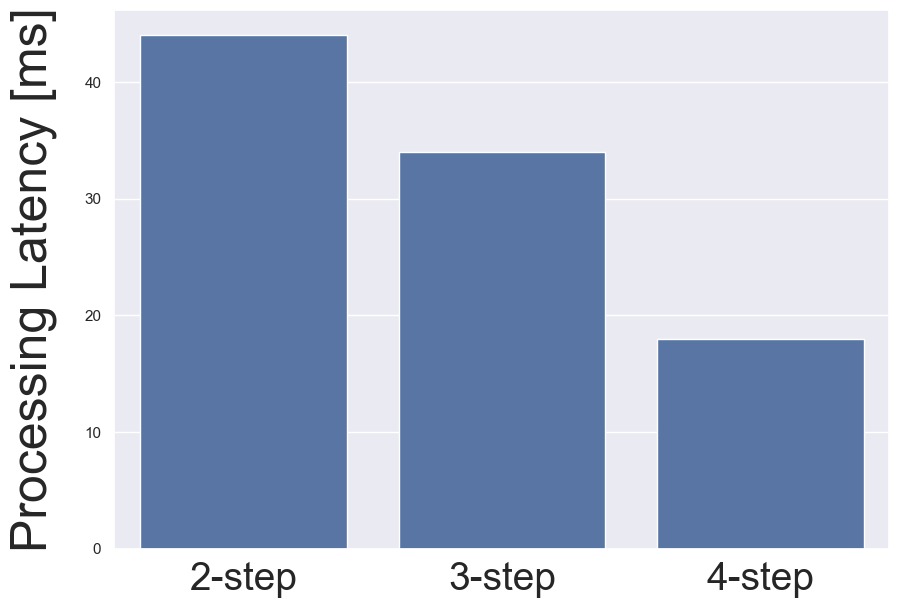

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.countplot(data=df_plan.dropna(axis=0), x='steps')
ax.set_ylabel('Processing Latency [ms]', fontsize=18*2, labelpad=20)
ax.set_xlabel('', fontsize=18*2, labelpad=20)
ax.set_xticklabels(['2-step', '3-step', '4-step'], fontsize=14*2)
plt.savefig('steps.png')
plt.show()

### Comparison of processing latency

<Axes: xlabel='run', ylabel='latency'>

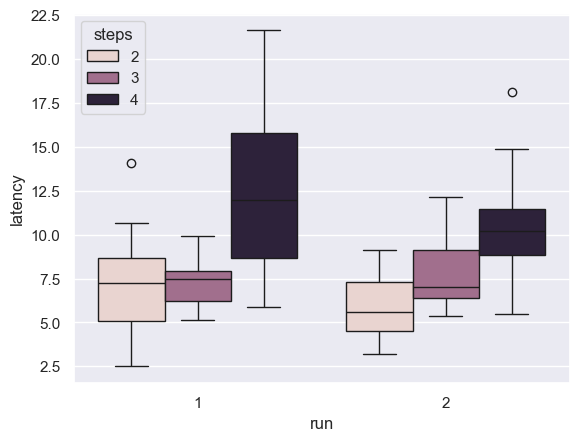

In [12]:
sns.boxplot(df_plan.dropna(axis=0), x='run', y='latency', hue='steps')

In [13]:
df_plan[df_plan.steps == 2].dropna(axis=0).latency.describe()

count    44.000000
mean      6.601795
std       2.495903
min       2.497000
25%       4.644250
50%       6.294500
75%       8.400000
max      14.092000
Name: latency, dtype: float64

In [14]:
df_plan[df_plan.steps == 3].dropna(axis=0).latency.describe()

count    34.000000
mean      7.569529
std       1.790372
min       5.124000
25%       6.340500
50%       7.096000
75%       8.651500
max      12.150000
Name: latency, dtype: float64

In [15]:
df_plan[df_plan.steps == 4].dropna(axis=0).latency.describe()

count    18.000000
mean     11.490778
std       4.666868
min       5.456000
25%       8.701750
50%      10.239500
75%      14.651250
max      21.618000
Name: latency, dtype: float64

<Axes: xlabel='steps', ylabel='latency'>

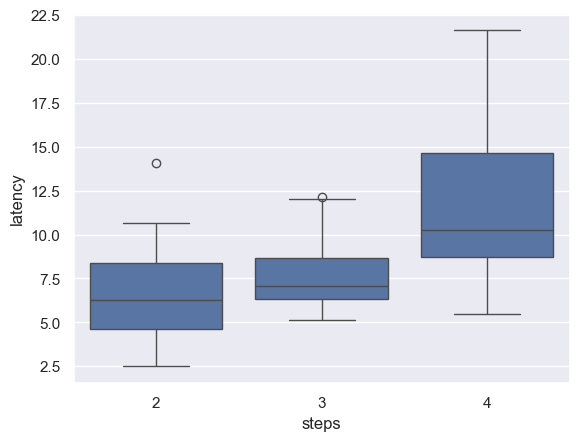

In [16]:
sns.boxplot(df_plan.dropna(axis=0), x='steps', y='latency')

In [17]:
def normal_test_battery(sample):
    stat, p = stats.shapiro(sample)
    if p < 0.05:
        print('Shapiro-Wilk s={:.3f} p={:.3f}, data does not look normal (reject H0)'.format(stat, p))
    else:
        print('Shapiro-Wilk s={:.3f} p={:.3f}, data looks normal (accept H0)'.format(stat, p))

    try:
        stat, p = stats.normaltest(sample)
        if p < 0.05:
            print('D’Agostino K^2 s={:.3f} p={:.3f}, data does not look normal (reject H0)'.format(stat, p))
        else:
            print('D’Agostino K^2 s={:.3f} p={:.3f}, data looks normal (accept H0)'.format(stat, p))
    except ValueError:
        pass
    
    result = stats.anderson(sample)
    print('\nAnderson-Darling s={}'.format(result.statistic))
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('{:.3f}: {:.3f}, data looks normal (accept H0)'.format(sl, cv))
        else:
            print('{:.3f}: {:.3f}, data does not look normal (reject H0)'.format(sl, cv))

In [18]:
normal_test_battery(df_plan[df_plan.steps == 2].dropna(axis=0).latency)

Shapiro-Wilk s=0.969 p=0.279, data looks normal (accept H0)
D’Agostino K^2 s=2.646 p=0.266, data looks normal (accept H0)

Anderson-Darling s=0.2817953613735611
15.000: 0.534, data looks normal (accept H0)
10.000: 0.609, data looks normal (accept H0)
5.000: 0.730, data looks normal (accept H0)
2.500: 0.852, data looks normal (accept H0)
1.000: 1.013, data looks normal (accept H0)


In [19]:
normal_test_battery(df_plan[df_plan.steps == 3].dropna(axis=0).latency)

Shapiro-Wilk s=0.922 p=0.018, data does not look normal (reject H0)
D’Agostino K^2 s=5.919 p=0.052, data looks normal (accept H0)

Anderson-Darling s=0.8014110896422295
15.000: 0.526, data does not look normal (reject H0)
10.000: 0.599, data does not look normal (reject H0)
5.000: 0.718, data does not look normal (reject H0)
2.500: 0.838, data looks normal (accept H0)
1.000: 0.996, data looks normal (accept H0)


In [20]:
normal_test_battery(df_plan[df_plan.steps == 4].dropna(axis=0).latency)

Shapiro-Wilk s=0.937 p=0.256, data looks normal (accept H0)
D’Agostino K^2 s=1.695 p=0.428, data looks normal (accept H0)

Anderson-Darling s=0.41561122028289077
15.000: 0.503, data looks normal (accept H0)
10.000: 0.573, data looks normal (accept H0)
5.000: 0.687, data looks normal (accept H0)
2.500: 0.802, data looks normal (accept H0)
1.000: 0.954, data looks normal (accept H0)


C:\Users\possi\Anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


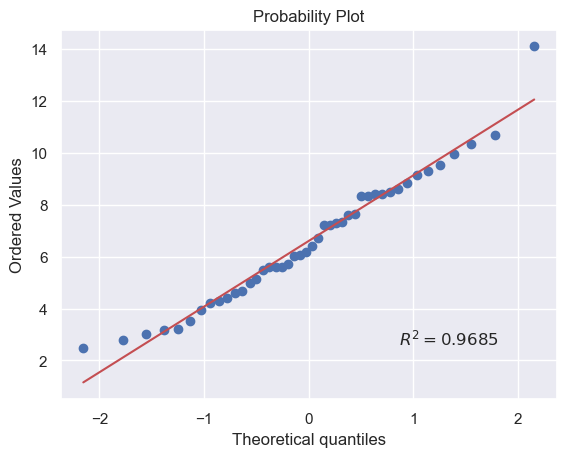

In [21]:
stats.probplot(df_plan[df_plan.steps == 2].dropna(axis=0).latency, plot=plt, rvalue=True); plt.show()

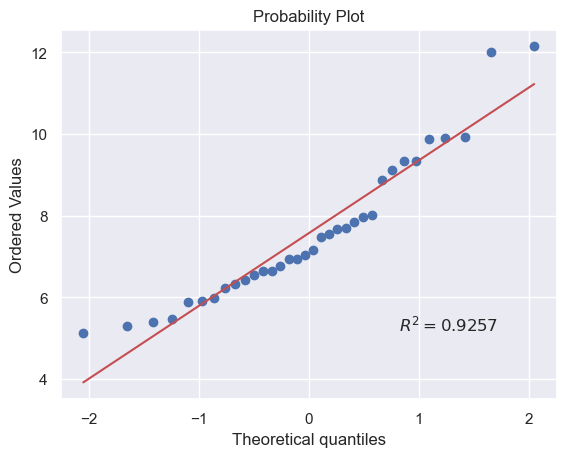

In [22]:
stats.probplot(df_plan[df_plan.steps == 3].dropna(axis=0).latency, plot=plt, rvalue=True); plt.show()

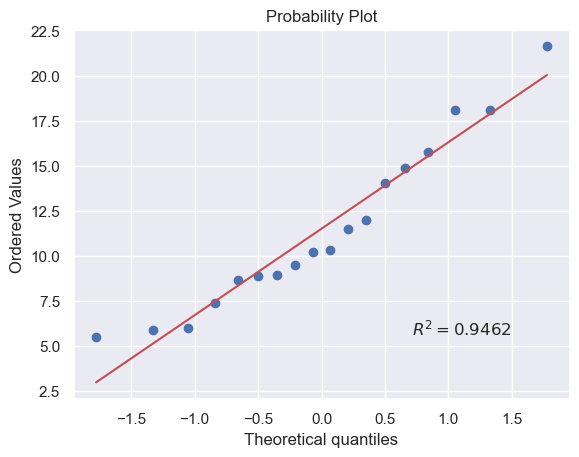

In [23]:
stats.probplot(df_plan[df_plan.steps == 4].dropna(axis=0).latency, plot=plt, rvalue=True); plt.show()

C:\Users\possi\AppData\Local\Temp\ipykernel_16620\463302526.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_plan.dropna(axis=0), x='steps', y='latency', errorbar='ci', ci=95)
C:\Users\possi\AppData\Local\Temp\ipykernel_16620\463302526.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2-step', '3-step', '4-step'], fontsize=14*2)


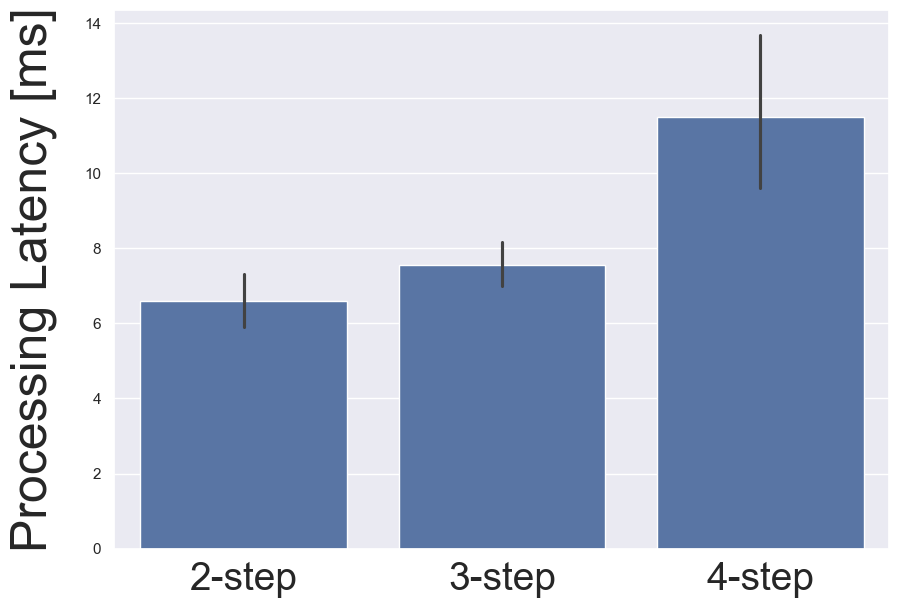

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.barplot(data=df_plan.dropna(axis=0), x='steps', y='latency', errorbar='ci', ci=95)
ax.set_ylabel('Processing Latency [ms]', fontsize=18*2, labelpad=20)
ax.set_xlabel('', fontsize=18*2, labelpad=20)
ax.set_xticklabels(['2-step', '3-step', '4-step'], fontsize=14*2)
plt.savefig('latency.png')
plt.show()

<Axes: ylabel='latency'>

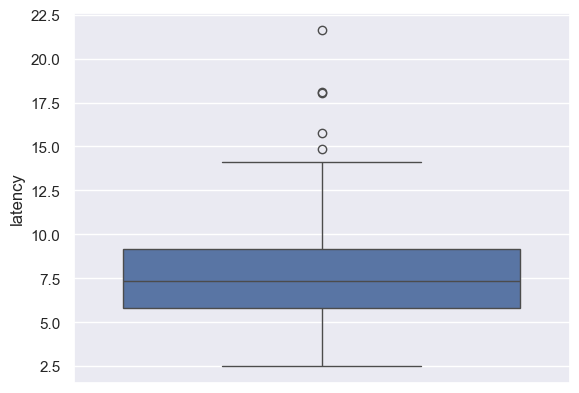

In [25]:
sns.boxplot(df_plan.dropna(axis=0), y='latency')

In [26]:
df_plan.dropna(axis=0).latency.describe()

count    96.000000
mean      7.861219
std       3.330423
min       2.497000
25%       5.831250
50%       7.321000
75%       9.181000
max      21.618000
Name: latency, dtype: float64

ConfidenceInterval(low=5.916302653002926, high=7.374684766246196)


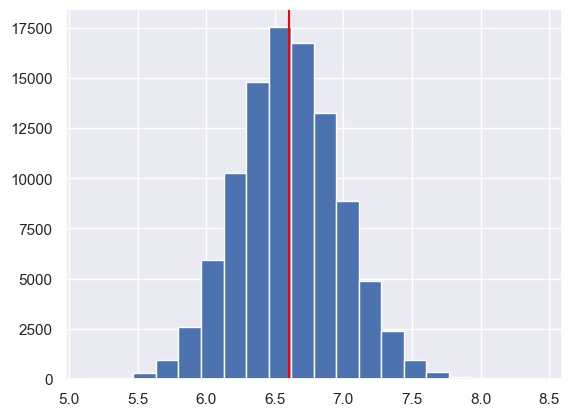

In [27]:
result = stats.bootstrap((df_plan[df_plan.steps == 2].latency, ), 
                          statistic=np.mean, 
                          n_resamples=100000,
                          confidence_level=0.95)

reference = df_plan[df_plan.steps == 2].latency.mean()
plt.hist(result.bootstrap_distribution, bins=20)
plt.axvline(reference, color='red')
print(result.confidence_interval)

ConfidenceInterval(low=7.035382352941177, high=8.235637437130752)


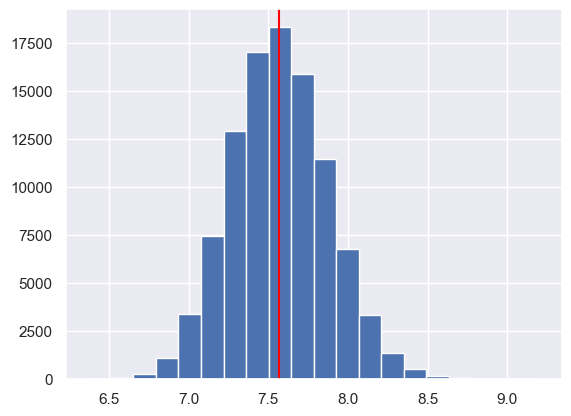

In [28]:
result = stats.bootstrap((df_plan[df_plan.steps == 3].latency, ), 
                          statistic=np.mean, 
                          n_resamples=100000,
                          confidence_level=0.95)

reference = df_plan[df_plan.steps == 3].latency.mean()
plt.hist(result.bootstrap_distribution, bins=20)
plt.axvline(reference, color='red')
print(result.confidence_interval)

ConfidenceInterval(low=9.616225782545667, high=13.82701743133583)


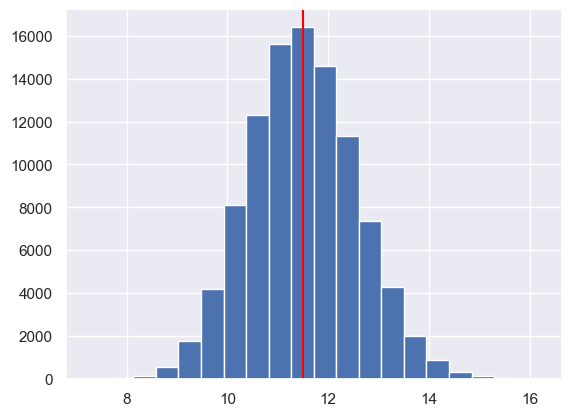

In [29]:
result = stats.bootstrap((df_plan[df_plan.steps == 4].latency, ), 
                          statistic=np.mean, 
                          n_resamples=100000,
                          confidence_level=0.95)

reference = df_plan[df_plan.steps == 4].latency.mean()
plt.hist(result.bootstrap_distribution, bins=20)
plt.axvline(reference, color='red')
print(result.confidence_interval)

# Model checking memory usage

In [30]:
df_mc.head()

,stack_data,set_data,state_size,n_states,adj_list_compile,stack_compile,set_compile,run,steps
0,8,15,4,15,184,12,24,1,2
1,8,15,4,15,184,12,24,1,2
2,8,15,4,15,184,12,24,1,2
3,8,7,4,15,184,12,24,1,4
4,4,4,4,15,184,12,24,1,4


In [31]:
result = ((df_mc.stack_data * df_mc.state_size) + \
(df_mc.set_data * df_mc.state_size) + \
(df_mc.n_states * df_mc.state_size) + \
df_mc.adj_list_compile + df_mc.set_compile + df_mc.stack_compile) * 8 / 1024 

df_mc['memory_usage_kb'] = result
df_mc.head()

,stack_data,set_data,state_size,n_states,adj_list_compile,stack_compile,set_compile,run,steps,memory_usage_kb
0,8,15,4,15,184,12,24,1,2,2.90625
1,8,15,4,15,184,12,24,1,2,2.90625
2,8,15,4,15,184,12,24,1,2,2.90625
3,8,7,4,15,184,12,24,1,4,2.65625
4,4,4,4,15,184,12,24,1,4,2.43750


<Axes: xlabel='steps', ylabel='memory_usage_kb'>

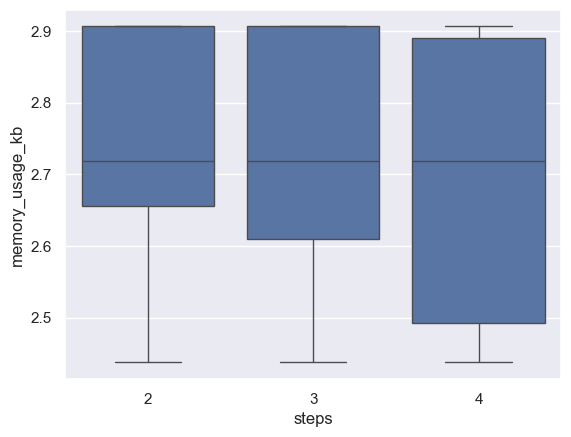

In [32]:
sns.boxplot(df_mc[df_mc.steps != 0], x='steps', y='memory_usage_kb')

<Axes: xlabel='steps', ylabel='memory_usage_kb'>

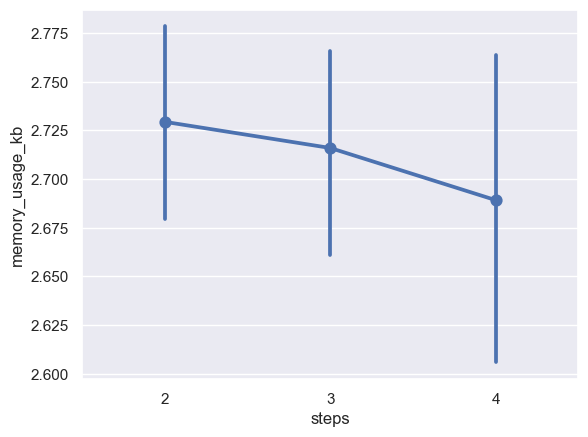

In [33]:
sns.pointplot(df_mc[df_mc.steps != 0], x='steps', y='memory_usage_kb')

C:\Users\possi\AppData\Local\Temp\ipykernel_16620\4083620053.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2-step', '3-step', '4-step'], fontsize=14*2)


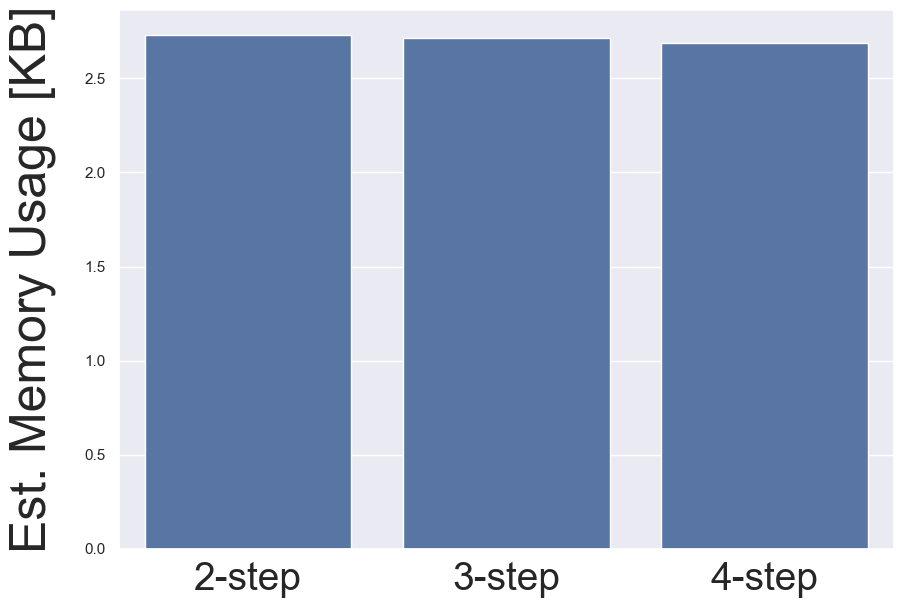

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.barplot(data=df_mc[df_mc.steps != 0], x='steps', y='memory_usage_kb', errorbar=None)
ax.set_ylabel('Est. Memory Usage [KB]', fontsize=18*2, labelpad=20)
ax.set_xlabel('', fontsize=18*2, labelpad=20)
ax.set_xticklabels(['2-step', '3-step', '4-step'], fontsize=14*2)
plt.savefig('mem_usage_mc.png')
plt.show()

In [35]:
df_mc[df_mc.steps == 2].dropna(axis=0).memory_usage_kb.describe()

count    44.000000
mean      2.729403
std       0.163834
min       2.437500
25%       2.656250
50%       2.718750
75%       2.906250
max       2.906250
Name: memory_usage_kb, dtype: float64

In [36]:
df_mc[df_mc.steps == 3].dropna(axis=0).memory_usage_kb.describe()

count    34.000000
mean      2.715993
std       0.159227
min       2.437500
25%       2.609375
50%       2.718750
75%       2.906250
max       2.906250
Name: memory_usage_kb, dtype: float64

In [37]:
df_mc[df_mc.steps == 4].dropna(axis=0).memory_usage_kb.describe()

count    18.000000
mean      2.689236
std       0.185179
min       2.437500
25%       2.492188
50%       2.718750
75%       2.890625
max       2.906250
Name: memory_usage_kb, dtype: float64

<Axes: xlabel='steps', ylabel='memory_usage_kb'>

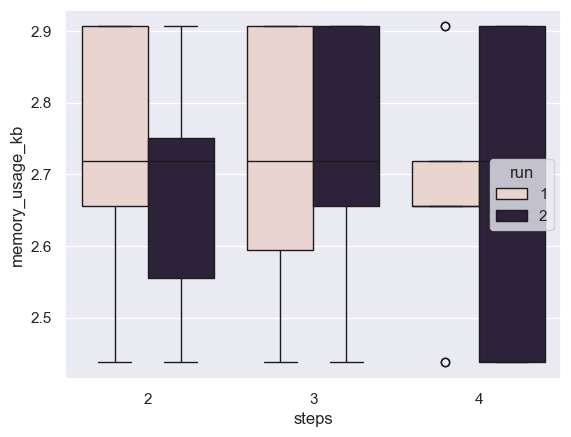

In [38]:
sns.boxplot(df_mc[df_mc.steps != 0], x='steps', y='memory_usage_kb', hue='run')

In [39]:
len(df_usage)

692490

In [40]:
df_usage[df_usage.method == 'multi'].shr / 1024

0         2.835938
1         2.835938
2         2.835938
3         2.835938
4         2.835938
            ...   
167539    2.968750
167540    2.968750
167541    2.968750
167542    2.968750
167543    2.968750
Name: shr, Length: 333150, dtype: float64

# Process memory usage

In [41]:
mc11max = df_mc[(df_mc.run == 1) & (df_mc.steps == 2)].memory_usage_kb.max()
mc12max = df_mc[(df_mc.run == 1) & (df_mc.steps == 3)].memory_usage_kb.max()
mc13max = df_mc[(df_mc.run == 1) & (df_mc.steps == 4)].memory_usage_kb.max()

mc11max, mc12max, mc13max

(2.90625, 2.90625, 2.90625)

In [42]:
mc21max = df_mc[(df_mc.run == 2) & (df_mc.steps == 2)].memory_usage_kb.max()
mc22max = df_mc[(df_mc.run == 2) & (df_mc.steps == 3)].memory_usage_kb.max()
mc23max = df_mc[(df_mc.run == 2) & (df_mc.steps == 4)].memory_usage_kb.max()

mc21max, mc22max, mc23max

(2.90625, 2.90625, 2.90625)

In [43]:
max = 2.90625

In [44]:
df_usage[df_usage.method == 'multi'].shr.max() / 1024

3.03125

In [45]:
df_usage[df_usage.method == 'multi'].res.max() - df_usage[df_usage.method == 'multi'].shr.max(), df_usage[df_usage.method == 'multi'].res.max() / 1024

(1088.0, 4.09375)

In [46]:
max / 1088

0.002671185661764706

In [47]:
max / (4.09375 * 1024)

0.0006932848282442748

In [48]:
df_usage[df_usage.method == 'single'].shr.max() / 1024

2.94921875

In [49]:
(df_usage[df_usage.method == 'single'].res.max() - df_usage[df_usage.method == 'single'].shr.max()), df_usage[df_usage.method == 'single'].res.max() / 1024

(900.0, 3.828125)